## CarDekho Price Prediction Model

### Problem Statement:

Develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.
### Objective
To predict Car Price using Machine Learning Model.
### Benefits:
The benefits of this solution include:
- Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.
- Buyers will be able to find cars that are priced more competitively.
- The overall used car market in India will become more efficient

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1.Data Preprocessing:

- Load and explore the dataset.
- Handle missing values and outliers.
- Convert categorical variables into numerical values.
- Perform feature selection.

In [2]:
# Import the dataset
df = pd.read_csv('Cardekho.csv')
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [75]:
# Getting info about data
df.info

(15411, 13)

In [76]:
# Getting shape of dataset
df.shape

(15411, 13)

In [16]:
# Checking for null values
print(df.isnull().sum())

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [17]:
# Checking for Duplicate values
df.duplicated().sum()

np.int64(167)

In [18]:
# Dropping rows with null values
df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

- Visualize relationships between features.
- Identify trends and patterns.

### 1.Univariate Analysis

It focuses on examining a single variable at a time. It helps in understanding the distribution of the data.

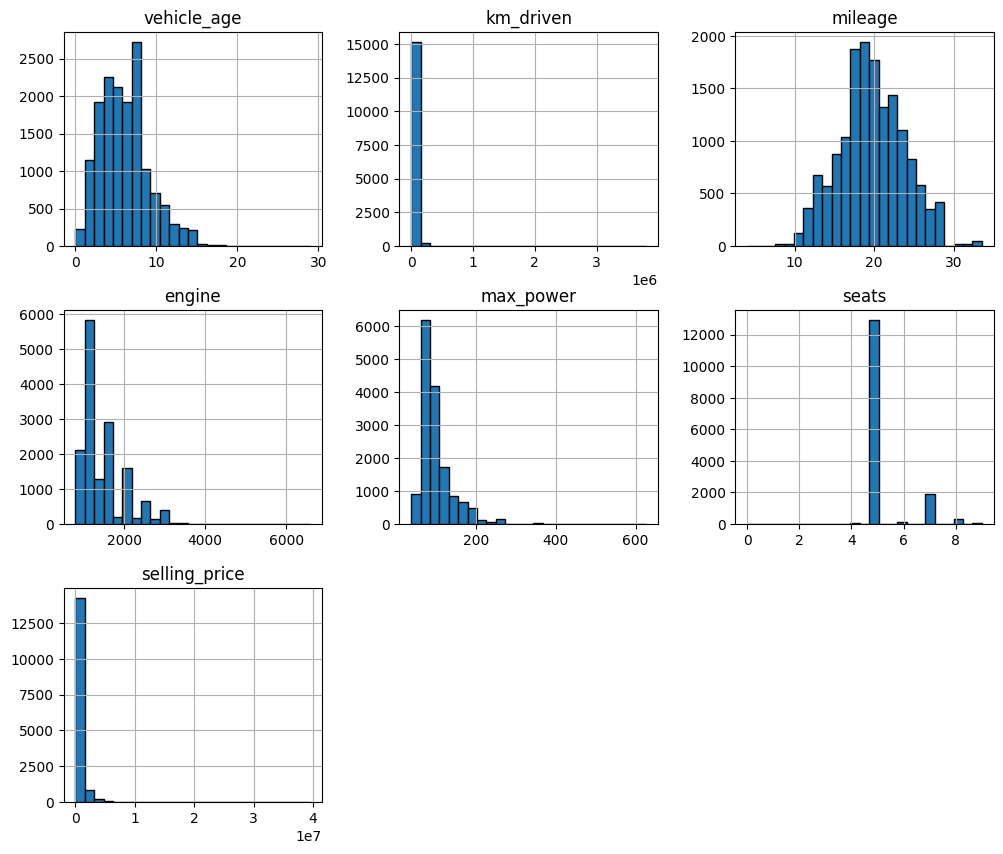

In [68]:
# Plot the density graphs of each of the numerical columns
df.hist(figsize=(12, 10), bins=25, edgecolor='black')
plt.show()

### 2.Bivariate Analysis

It helps in understanding the relationship between two variables, and alows us to know how they are related with each other negatively or postively.

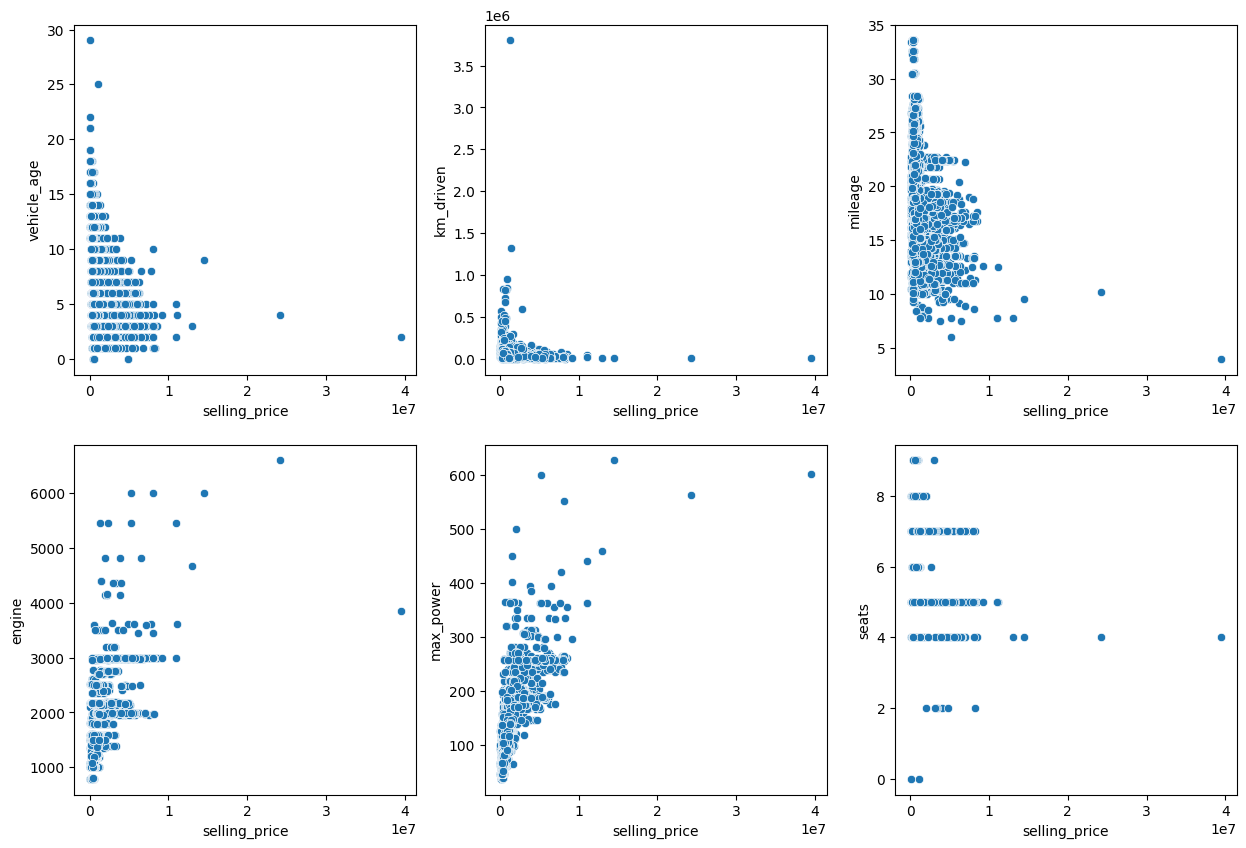

In [60]:
# Visualizing the relationship between numerical features and selling price
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(data = df, x = 'selling_price', y = numerical_columns[i])

plt.show()

### 3.Multivariate Analysis (Relation between multiple variables)

In [57]:
# Define the numerical features for correlation analysis
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'selling_price', 'engine', 'max_power', 'seats']

# Compute the correlation matrix for the selected numerical features
correlation_matrix = df[numerical_features].corr()

# Output the correlation matrix
print(correlation_matrix)

               vehicle_age  km_driven   mileage  selling_price    engine  \
vehicle_age       1.000000   0.333891 -0.257394      -0.241851  0.098965   
km_driven         0.333891   1.000000 -0.105239      -0.080030  0.192885   
mileage          -0.257394  -0.105239  1.000000      -0.305549 -0.632987   
selling_price    -0.241851  -0.080030 -0.305549       1.000000  0.585844   
engine            0.098965   0.192885 -0.632987       0.585844  1.000000   
max_power         0.005208   0.044421 -0.533128       0.750236  0.807368   
seats             0.030791   0.192830 -0.440280       0.115033  0.551236   

               max_power     seats  
vehicle_age     0.005208  0.030791  
km_driven       0.044421  0.192830  
mileage        -0.533128 -0.440280  
selling_price   0.750236  0.115033  
engine          0.807368  0.551236  
max_power       1.000000  0.172257  
seats           0.172257  1.000000  


<Axes: >

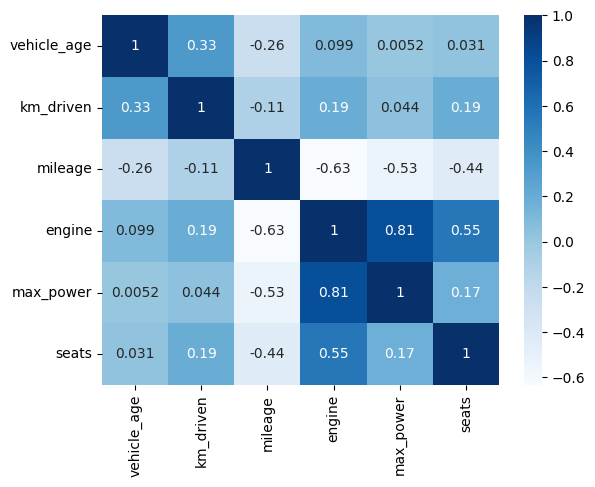

In [6]:
# Plot the heatmap of the correlation between each of the numerical features
sns.heatmap(data = df[numerical_columns].corr(), annot=True, cmap='Blues')

## Model Selection & Training:

In [7]:
#Creating Model Data from Dataframe
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
# Encode categorical variables into binary (0,1) format using one-hot encoding
model_data = pd.get_dummies(model_data, dtype=int)
model_data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,car_name_Audi A4,car_name_Audi A6,car_name_Audi A8,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [51]:
# Dropping the unwanted columns(Less Required Cols)
model_data.drop(labels=['car_name', 'brand', 'model', 'seller_type'], axis=1, inplace=True)

In [52]:
model_data.head()

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [53]:
# Convert the categorical variables into a set of binary(0,1) 
model_data = pd.get_dummies(model_data, dtype = int)
model_data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0,1


In [24]:
#Removing Target Variable and creating the feature matrix `X`, which will be used for training the model.
X = model_data.drop('selling_price', axis=1)
X.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,0,1,0,0,0,0,1


In [54]:
# Creating the Target matrix `Y`, which contains target variable
Y = model_data['selling_price']
Y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

### Features (X) and Target (y) in Supervised Learning  

- **Features (X):** Input variables used to predict the target. Examples:  
  - Vehicle age
  - Kilometers driven
  - Mileage
  - Engine capacity
  - Max power
  - Seats  

- **Target (y):** The output/target variable we want to predict, i.e., selling price of the vehicle.

### Why Split the Dataset?  
- **X (Features):** Helps the model learn patterns influencing the target.  
- **y (Target):** The value the model aims to predict.  
- This separation allows the model to map inputs to outputs effectively.

### Split data into training and testing sets.

In [55]:
# Divide the dataset into training (80%) and testing (20%) subsets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

# Display the dimensions of the training and testing sets
print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")

# Extract feature variables by removing the target variable ('selling_price')
X = model_data.drop('selling_price', axis=1)

Training set size: (12328, 13), Testing set size: (3083, 13)


### Train the Regression Model

In [48]:
# Instantiate the Linear Regression model
regressor = LinearRegression()

# Fit the model using the training dataset
regressor.fit(train_X, train_Y)

# Generate predictions on the test dataset
predictions = regressor.predict(test_X)

# Display the first 10 predicted values
print(predictions[:10])

[ 776871.41915609 1099450.93498701  671236.14714065   38683.68219502
  779386.08366047  920598.8955017  -963324.81544129  549507.95761286
 -209621.79325851  830604.56009611]


In [28]:
print(test_Y)

9878      600000
15222     950000
10299     500000
5233     2250000
2617      975000
          ...   
10241     680000
6293      780000
2675      650000
9114     1750000
9821      625000
Name: selling_price, Length: 3083, dtype: int64


In [29]:
test_X['predicted_sales_price'] = predictions

test_X['Actual_price'] = test_Y

test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

In [30]:
test_X

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
9878,3,39000,21.40,1197,83.10,5,0,0,0,0,1,0,1,6.929032e+05,600000,92903.208901
15222,2,25000,16.55,2498,105.00,6,0,1,0,0,0,0,1,1.152651e+06,950000,202650.506896
10299,7,100000,22.54,1396,88.73,5,0,1,0,0,0,0,1,5.036370e+05,500000,3637.017559
5233,8,65000,13.00,2143,201.10,5,0,1,0,0,0,1,0,2.204248e+06,2250000,-45752.269290
2617,3,43000,24.30,1248,88.50,5,0,1,0,0,0,1,0,9.272501e+05,975000,-47749.860399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,2,22000,28.40,1248,74.00,5,0,1,0,0,0,0,1,7.430093e+05,680000,63009.306211
6293,11,142000,12.80,2494,102.00,8,0,1,0,0,0,0,1,3.957022e+05,780000,-384297.811618
2675,6,62248,13.60,2523,63.00,7,0,1,0,0,0,0,1,1.897443e+05,650000,-460255.729458
9114,2,20000,17.00,1956,138.10,5,0,1,0,0,0,0,1,1.605208e+06,1750000,-144791.826713


# Model Evaluation

#### **Evaluating Model Using**

- **RMSE (Root Mean Squared Error)**: Measures the average magnitude of error in predictions, scaled to the same unit as the target variable, making it easier to interpret.
- **MAE (Mean Absolute Error)**: Represents the average absolute difference between actual and predicted values, providing a straightforward measure of accuracy.
- **R² Score (Coefficient of Determination)**: Indicates how well the model explains variance in the target variable, with values closer to 1 representing a better fit.

In [43]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, predictions))

# Calculate R² Score
r2 = r2_score(test_Y, predictions)

# Calculate MAE
mae = mean_absolute_error(test_Y, predictions)

# Print Results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 448244.3434028541
R² Score: 0.6581919022047984
Mean Absolute Error (MAE): 254941.97263564492


### Model evaluation results show:

- **RMSE (448,244.34)**: The average prediction error is around ₹4.48 lakh. Lower RMSE indicates a better fit.
- **R² Score (0.658)**: About 65.8% of the variance in selling price is explained by the model. A higher R² (closer to 1) means a better model.
- **MAE (254,941.97)**: The average absolute error in predictions is around ₹2.55 lakh.

### Visualizing the Predictions

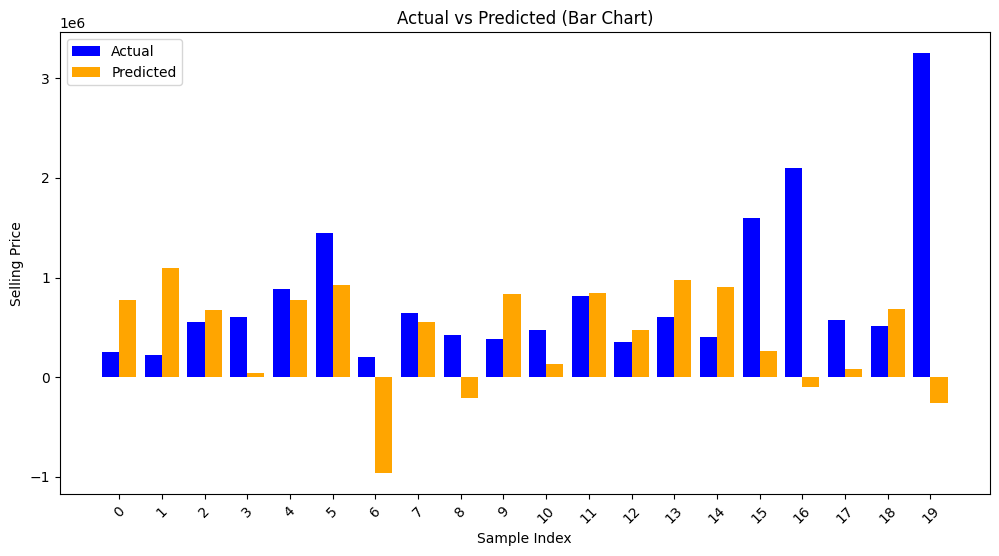

In [72]:
plt.figure(figsize=(12, 6))
indices = np.arange(20)  # First 20 predictions
width = 0.4

plt.bar(indices - width/2, test_Y[:20], width=width, label="Actual", color='blue')
plt.bar(indices + width/2, predictions[:20], width=width, label="Predicted", color='orange')

plt.xticks(indices, rotation=45)
plt.xlabel("Sample Index")
plt.ylabel("Selling Price")
plt.title("Actual vs Predicted (Bar Chart)")
plt.legend()
plt.show()

### Actual vs Predicted (Bar Chart):

- The bar chart visualizes actual and predicted selling prices for a subset of data points.
- Blue bars represent actual prices, and orange bars represent predicted prices.
- The model performs well in most cases, but there are instances where predicted values are lower or higher than actual values.
- Some predictions show significant variance from actual prices, indicating areas for model improvement.

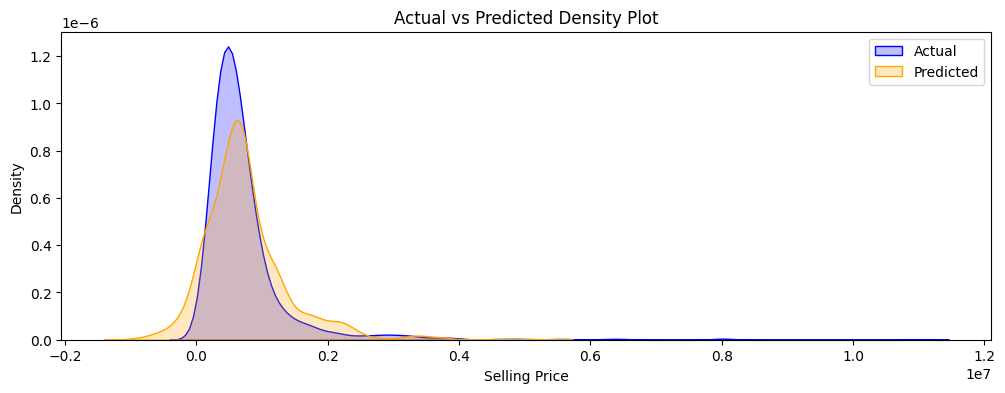

In [36]:
plt.figure(figsize=(12,4))
sns.kdeplot(test_Y, label="Actual", fill=True, color='blue')
sns.kdeplot(predictions, label="Predicted", fill=True, color='orange')
plt.title("Actual vs Predicted Density Plot")
plt.xlabel("Selling Price")
plt.legend()
plt.show()

### Actual vs Predicted Density Plot:

- The density plot compares the distribution of actual and predicted selling prices.
- The blue curve represents actual selling prices, while the orange curve represents predicted values.
- The predicted values closely follow the actual values but show some deviation, indicating the model's accuracy.
- The peak of the predicted values is slightly lower than the actual peak, suggesting some underestimation.